In [1]:
!pip install dipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Daniel Bandala @ mar-2023
# dti-model training script
# general libraries
import numpy as np
import matplotlib.pyplot as plt
# diffussion image processing
from dipy.io.image import load_nifti
import torch
from torchvision.transforms import functional as TF

In [4]:
# set plot parameters
plt.rcParams.update({'font.size': 20})

In [5]:
# folders dataset
main_dir = '/content/drive/MyDrive/dti-transformer/dti_data/HCP'
# read difussion data
data, _ = load_nifti(main_dir+'/case_16/output/DTI_FA.nii.gz')
data.shape

(140, 140, 96)

In [6]:
data = torch.tensor(data.transpose(2,0,1))

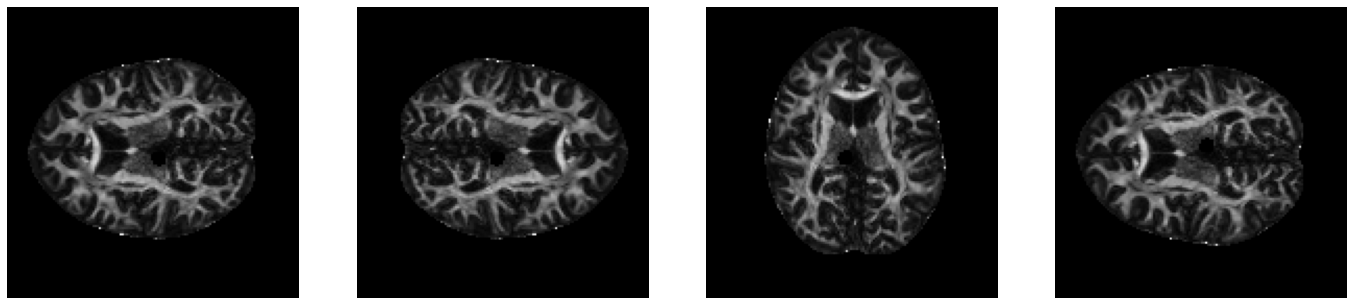

In [7]:
plt.figure(figsize=(24,16))
plt.subplot(1, 4, 1).set_axis_off()
plt.imshow(data[48, :, :], cmap='gray', origin='lower')
plt.subplot(1, 4, 2).set_axis_off()
plt.imshow(TF.hflip(data[48, :, :]), cmap='gray', origin='lower')
plt.subplot(1, 4, 3).set_axis_off()
plt.imshow(TF.rotate(data, 90)[48, :, :], cmap='gray', origin='lower')
plt.subplot(1, 4, 4).set_axis_off()
plt.imshow(TF.vflip(data[48, :, :]), cmap='gray', origin='lower')
plt.savefig('data_augmentation.png')